# MNIST Digit recognition (SVM)

__Handwritten digit recognition using SVM (Linear as well as Non Linear)__

### Table Of Content:
* [Problem Overview](#Problem-Overview)
* [Solution Overview](#Solution-Overview)
* [Importing Libraries](#Importing-Libraries)
* [Importing Dataset](#Importing-Dataset)
* [Understanding Dataset](#Understanding-Dataset)
* [Preparing Dataset](#Preparing-Dataset)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Dataset Test and Train Split](#Dataset-Test-and-Train-Split)
* [Building Linear SVM Model](#Building-Linear-SVM-Model)
* [Optimizing Hyperparameter C and Evaluation of Final Linear SVM Model](#Optimizing-Hyperparameter-C-and-Evaluation-of-Final-Linear-SVM-Model)
* [Building Non Linear SVM Model](#Building-Non-Linear-SVM-Model)
* [Optimizing Hyperparameter C Gamma and Evaluation of Final Non Linear SVM Model](#Optimizing-Hyperparameter-C-Gamma-and-Evaluation-of-Final-Non-Linear-SVM-Model)
* [Observing the performance of our final Model](#Observing-the-performance-of-our-final-Model)
* [Making predictions for Test Dataset using the final Model](#Making-predictions-for-Test-Dataset-using-the-final-Model)

----

### Problem Overview

* You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits.
* The digits range from 0-9. The classification is based on the pixel values given as features. 
* Each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. 
* This is a 10-class classification problem. 

----

### Solution Overview

* We will try to solve the problem firstly using Linear SVM Model.
* We will optimize the values of Hyper-Parameter (C) to obtain best accuracy.
* We will then try to solve the problem using Non Linear SVM Model.
* We will optimize the values of Hyper-Parameters (C, Gamma) to obtain best accuracy.
* We will compare the performance of each of these models and use the best model to predict for Test Dataset.

----

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, validation_curve, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [2]:
# Checking version of imported libraries
np.__version__, pd.__version__, sns.__version__

('1.16.2', '0.24.2', '0.9.0')

In [3]:
# Making miscellaneous setting for better experience
import warnings
warnings.filterwarnings('ignore')

----

### Importing Dataset

In [4]:
# Importing training dataset (train.csv)
training_dataframe = pd.read_csv('train.csv')

# Importing testing dataset (test.csv)
testing_dataframe = pd.read_csv('test.csv')

----

### Understanding Dataset

In [5]:
# Understanding the training dataset | Shape
training_dataframe.shape

(42000, 785)

In [6]:
# Understanding the training dataset | Meta Data
training_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# Understanding the training dataset | Data Content
training_dataframe.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
# Understanding the training dataset | Sample Data
training_dataframe.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Understanding the training dataset | Missing Values
sum(training_dataframe.isnull().sum())

0

**Summary of Dataset Understanding:**
1. Dataset is clean (no missing values)
2. Dataset is large (42000 rows and 785 columns)
3. Dataset is purely numeric (all 785 columns are int64)
4. Dataset contains insignificant columns (several columns have single value)

----

### Preparing Dataset

In [10]:
# Dropping Duplicate Values
training_dataframe.drop_duplicates(inplace=True)

In [11]:
# Taking a random subset of training dataset (containing 25% of rows from the original dataset)
rcount = int(.25*training_dataframe.shape[0])
subset_training_dataframe = training_dataframe.sample(n=rcount)

In [12]:
# Understanding the processed training dataset | Shape
subset_training_dataframe.shape

(10500, 785)

**Summary of Dataset Preparation:**
1. We have 76 (785-709) insignificant columns, however, we are leaving them as it is for later use of plotting image.
2. We took a random subset (25% of our dataframe) since the dataset is large.

----

### Exploratory Data Analysis

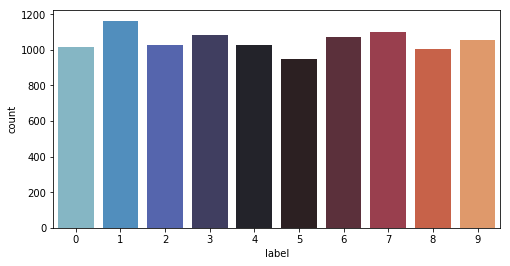

In [13]:
# Clecking if all labels are present almost equally in subset training dataset
plt.figure(figsize=(8,4))
sns.countplot(subset_training_dataframe['label'], palette = 'icefire')

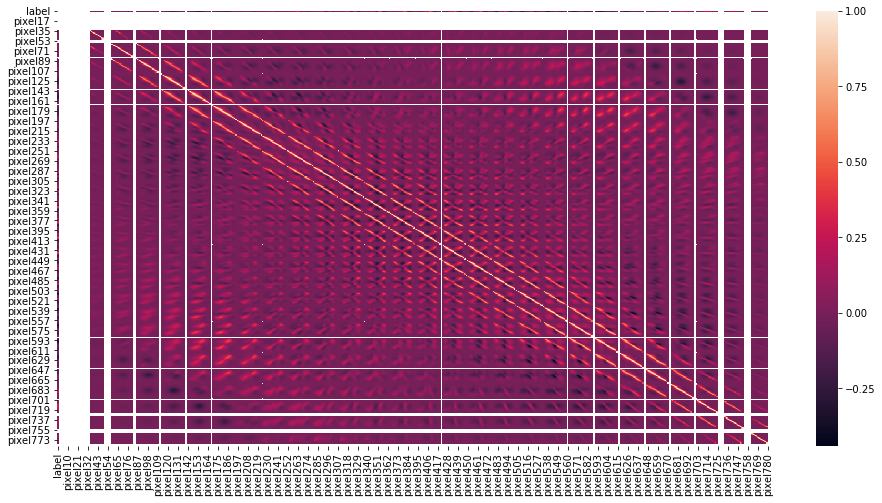

In [14]:
# Checking for collinearity in dataset
plt.figure(figsize=(16,8))
sns.heatmap(data=subset_training_dataframe.corr(),annot=False)

**Summary of Exploratory Data Analysis:**
1. All labels are present almost equally in subset training dataset
2. Since we see clear pattern in the heatmap, the dataset is highly correlated
3. Adjacent/Nearby pixel values are correlated, which we expect as well.

----

### Dataset Test and Train Split

In [15]:
# splitting into X and y
X = subset_training_dataframe.drop("label", axis = 1)
y = subset_training_dataframe.label.values.astype(int)

In [16]:
# scaling the features
X = scale(X)

In [17]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [18]:
# confirm that splitting also has similar distribution
print(y_train.mean())
print(y_test.mean())

4.461360544217687
4.516825396825396


----

### Building Linear SVM Model

In [19]:
# Model building

# instantiate an object of class SVC() using cost C=1, gamma='auto'
model = SVC(C = 1, gamma='auto')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model using confusion matrix 
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[285,   0,   2,   0,   1,   1,   5,   0,   1,   0],
       [  0, 334,   3,   0,   0,   0,   0,   0,   1,   1],
       [  2,   0, 295,   3,   2,   1,   2,   7,   3,   1],
       [  0,   1,  10, 291,   0,   8,   0,   1,   6,   1],
       [  0,   0,  10,   0, 288,   0,   2,   1,   0,   7],
       [  0,   2,   7,   5,   0, 251,   9,   0,   2,   2],
       [  3,   0,   9,   0,   1,   4, 319,   0,   0,   0],
       [  2,   2,   7,   0,   3,   0,   0, 313,   0,   9],
       [  0,   3,   4,   5,   3,   3,   3,   0, 280,   2],
       [  0,   1,   3,   5,   7,   1,   0,  12,   2, 290]], dtype=int64)

In [21]:
# Model Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9352380952380952


In [22]:
# K-Fold Cross Validation

# Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# Instantiating a model with cost=1, gamma='auto'
model = SVC(C = 1, gamma='auto')

# computing the cross-validation scores 
# Argument cv takes the 'folds' object, and we have specified 'accuracy' as the metric
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy', n_jobs=-1)

# print 5 accuracies obtained from the 5 folds
print(cv_results)
print(f'mean accuracy = {cv_results.mean()}')

[0.92176871 0.9244898  0.94489796 0.93265306 0.93333333]
mean accuracy = 0.9314285714285715


----

### Optimizing Hyperparameter C and Evaluation of Final Linear SVM Model

In [23]:
# Grid Search to Find Optimal Hyperparameter C

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(gamma='auto')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring='accuracy', cv=folds, n_jobs=-1,
                        verbose=1, return_train_score=True)

# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)  

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.1min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,41.743395,0.851182,8.611175,0.229426,0.1,{'C': 0.1},0.859864,0.852381,0.879592,0.873469,...,0.868435,0.010509,5,0.888946,0.884694,0.880442,0.889456,0.886054,0.885918,0.003261
1,22.500843,0.646209,5.979610,0.162137,1,{'C': 1},0.921769,0.924490,0.944898,0.932653,...,0.931429,0.008100,4,0.981973,0.980442,0.977211,0.980612,0.978571,0.979762,0.001673
2,20.614284,0.247863,5.331545,0.175322,10,{'C': 10},0.928571,0.933333,0.949660,0.936735,...,0.937007,0.006999,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,19.703322,0.223585,5.242185,0.076416,100,{'C': 100},0.928571,0.931973,0.951020,0.936735,...,0.936735,0.007684,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,18.696213,1.204673,4.865989,0.203130,1000,{'C': 1000},0.928571,0.931973,0.951020,0.936735,...,0.936735,0.007684,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


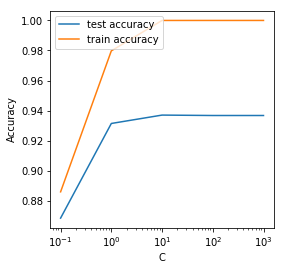

In [24]:
# plot of C versus train and test scores

plt.figure(figsize=(4, 4))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [25]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9370068027210884 at C = 10


In [26]:
# model with the best value of C
model = SVC(C=best_C, gamma='auto')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [27]:
# Optimal Final Linear SVM Model Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9425396825396826


----

### Building Non Linear SVM Model

In [28]:
# Model building

# instantiate an object of class SVC() using cost C=1, Gamma='auto', Kernel='rbf'
model = SVC(C = 1, gamma='auto', kernel='rbf')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model using confusion matrix 
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[285,   0,   2,   0,   1,   1,   5,   0,   1,   0],
       [  0, 334,   3,   0,   0,   0,   0,   0,   1,   1],
       [  2,   0, 295,   3,   2,   1,   2,   7,   3,   1],
       [  0,   1,  10, 291,   0,   8,   0,   1,   6,   1],
       [  0,   0,  10,   0, 288,   0,   2,   1,   0,   7],
       [  0,   2,   7,   5,   0, 251,   9,   0,   2,   2],
       [  3,   0,   9,   0,   1,   4, 319,   0,   0,   0],
       [  2,   2,   7,   0,   3,   0,   0, 313,   0,   9],
       [  0,   3,   4,   5,   3,   3,   3,   0, 280,   2],
       [  0,   1,   3,   5,   7,   1,   0,  12,   2, 290]], dtype=int64)

In [30]:
# Model Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9352380952380952


In [31]:
# K-Fold Cross Validation

# Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# Instantiating a model with cost=1, Gamma='auto', Kernel='rbf'
modelkernel=SVC(C = 1, gamma='auto', kernel='rbf')

# computing the cross-validation scores 
# Argument cv takes the 'folds' object, and we have specified 'accuracy' as the metric
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy', n_jobs=-1)

# print 5 accuracies obtained from the 5 folds
print(cv_results)
print(f'mean accuracy = {cv_results.mean()}')

[0.92176871 0.9244898  0.94489796 0.93265306 0.93333333]
mean accuracy = 0.9314285714285715


----

### Optimizing Hyperparameter C Gamma and Evaluation of Final Non Linear SVM Model

In [32]:
# Grid Search to Find Optimal Hyperparameter C, Gamma

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator=model, param_grid=hyper_params, 
                        scoring='accuracy', cv=folds, n_jobs=-1,
                        verbose=1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 29.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,90.785675,0.265654,10.658901,0.072276,1,0.1,"{'C': 1, 'gamma': 0.1}",0.172109,0.159184,0.166667,...,0.167347,0.004752,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,79.229173,0.835161,9.219151,0.136445,1,0.01,"{'C': 1, 'gamma': 0.01}",0.742857,0.723810,0.755782,...,0.745986,0.012883,12,0.999490,0.999830,0.999490,1.000000,0.999830,0.999728,0.000204
2,19.851127,0.203997,5.408140,0.070716,1,0.001,"{'C': 1, 'gamma': 0.001}",0.919728,0.924490,0.944898,...,0.930340,0.008536,4,0.976361,0.974320,0.970578,0.972959,0.973299,0.973503,0.001883
3,29.280117,0.194078,7.576742,0.173706,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.893197,0.897959,0.923129,...,0.904218,0.010194,8,0.921599,0.919728,0.915136,0.918707,0.918197,0.918673,0.002117
4,90.007755,1.016363,10.813688,0.078530,10,0.1,"{'C': 10, 'gamma': 0.1}",0.178912,0.160544,0.171429,...,0.171020,0.006632,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,81.271313,1.149147,9.364363,0.132484,10,0.01,"{'C': 10, 'gamma': 0.01}",0.758503,0.743537,0.778231,...,0.764218,0.012782,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,16.849153,0.282893,4.875364,0.086858,10,0.001,"{'C': 10, 'gamma': 0.001}",0.934694,0.935374,0.948980,...,0.938639,0.005294,1,0.999830,0.999660,0.999660,0.999830,0.999490,0.999694,0.000127
7,13.218659,0.142934,4.594515,0.143671,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.917007,0.929252,0.938095,...,0.929252,0.006870,5,0.963946,0.962925,0.960544,0.960544,0.962925,0.962177,0.001384
8,92.078219,0.687062,10.932370,0.198034,100,0.1,"{'C': 100, 'gamma': 0.1}",0.178912,0.160544,0.171429,...,0.171020,0.006632,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,81.521047,0.578743,9.349600,0.116016,100,0.01,"{'C': 100, 'gamma': 0.01}",0.758503,0.743537,0.778231,...,0.764218,0.012782,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


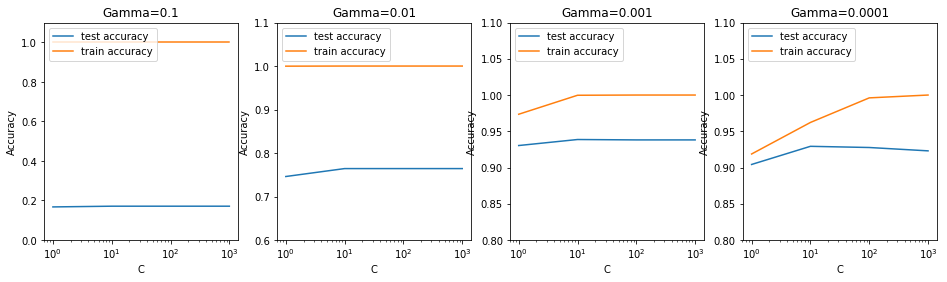

In [33]:
# plot of C and Gamma versus train and test scores

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# plotting
plt.figure(figsize=(16,4))

# subplot 1/4
plt.subplot(141)
gamma_1 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_1["param_C"], gamma_1["mean_test_score"])
plt.plot(gamma_1["param_C"], gamma_1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.0, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/4
plt.subplot(142)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.6, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/4
plt.subplot(143)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.8, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 4/4
plt.subplot(144)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.8, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [34]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(f'The best test score is {best_score} corresponding to hyperparameters {best_hyperparams}')

The best test score is 0.9386394557823129 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [35]:
# model with the best value of C and Gamma
model = SVC(C=best_hyperparams['C'], gamma=best_hyperparams['gamma'], kernel="rbf")

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [36]:
# Optimal Final Linear SVM Model Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9453968253968253


**Selection of best model:**
* Accuracy is our primary concern, and there is no major different with Linear or a Non Linear SVM Model.
* Considering our final model is the Final Non Linear SVM Model

----

### Observing the performance of our final Model

In [37]:
# Predicting values for our Test Split of Training Dataset
test_predict = model.predict(X_test)

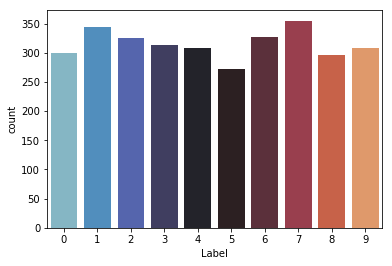

In [38]:
# Plotting the distribution of our prediction
d = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
dataframe_to_export = pd.DataFrame(data=d)
sns.countplot(dataframe_to_export['Label'], palette = 'icefire')

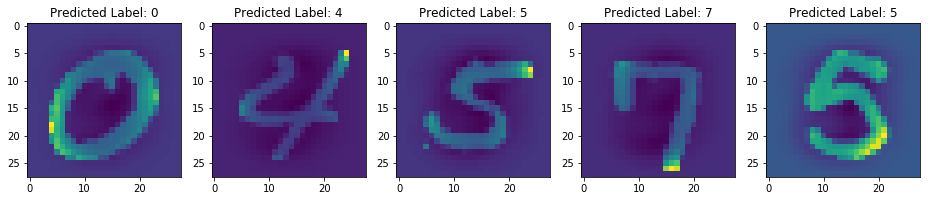

In [39]:
# Les't visualize our Final Model in Action for few unseen images from Training Dataset

a = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for k,v in enumerate(a):
    plt.subplot(150+k+1)
    _2d = X_test[v].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[v]}')
    plt.imshow(_2d)
plt.show()

----

### Making predictions for Test Dataset using the final Model

In [40]:
# Predicting values for unseen Test Dataset

# scaling the features
testing_dataframe = scale(testing_dataframe)

test_predict = model.predict(testing_dataframe)

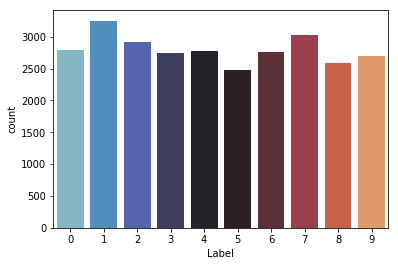

In [41]:
# Plotting the distribution of our prediction
d = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
dataframe_to_export = pd.DataFrame(data=d)
sns.countplot(dataframe_to_export['Label'], palette = 'icefire')

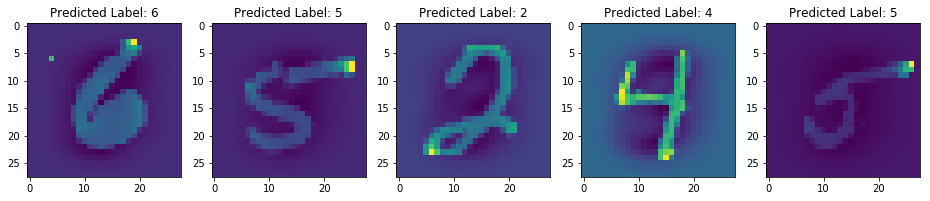

In [42]:
# Les't visualize our Final Model in Action for few images from Test Dataset

a = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for k,v in enumerate(a):
    plt.subplot(150+k+1)
    _2d = testing_dataframe[v].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[v]}')
    plt.imshow(_2d)
plt.show()

In [43]:
# Exporting the Predicted values for evaluation at Kaggle
dataframe_to_export.to_csv(path_or_buf='submission.csv', index=False)

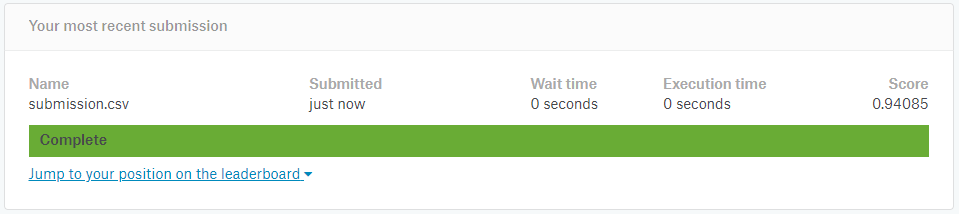

**Summary:**
* Used 25% of the Training Dataset to build the Model
* There is no major difference between the accuracy of Linear SVM vs. Non-Linear SVM
* Our final model is a Non-Linear SVM Model since at times we observed 1% improvement in accuracy
* For our final Model, optimized values of hyperparameters are C = 10 and Gamma = 0.001
* For our final Model, accuracy is roughly 94.5%
* Predictions made using our final Model got a score of 0.94085 upon submission at Kaggle

----